# UE709 Network and Algorithms

## Practical Work 2 - Asif Mammadov

## 3.1 Cities

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
data = pd.read_csv('cities_in_az.csv')
data

,Origin,Destiny,Hours
0,Alat,Baku,1.08
1,Baku,Alat,1.13
2,Alat,Shirvan,0.83
3,Shirvan,Alat,0.80
4,Imishli,Shirvan,1.42
5,Shirvan,Imishli,1.38
6,Shamakhi,Imishli,1.83
7,Imishli,Shamakhi,1.87
8,Shamakhi,Baku,1.67
9,Baku,Shamakhi,1.77


In [4]:
G = nx.from_pandas_edgelist(data, source='Origin', target='Destiny', edge_attr=True, create_using=nx.DiGraph)

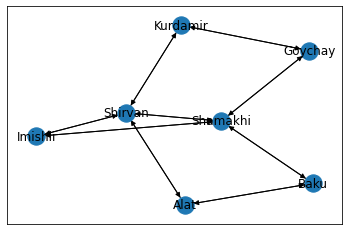

In [5]:
plt.figure()
nx.draw_networkx(G, with_labels=True)
plt.show()

In [6]:
# shortes path from Baku to Imishli without weight
print(nx.shortest_path(G, source='Baku', target='Imishli'))

['Baku', 'Shamakhi', 'Imishli']


In [7]:
# shortes path from Baku to Imishli with weight
print(nx.shortest_path(G, source='Baku', target='Imishli', weight='Hours'))

['Baku', 'Alat', 'Shirvan', 'Imishli']


If we do not consider the weigth, the shortest path from Baku to Imishli is ineed takes 2 edges. Baku -> Shamakhi and Shamakhi -> Imishli.
However, when we consider the weight, the previous path would take 1.77 + 1.83 = 3.6 Hours. The path [Baku, Alat, Shirvan, Imishli] on the other hand, would only take 1.13 + 0.83 + 1.38 = 3.34 hours making it the shortest path now.

In [8]:
nx.add_path(G, ['Baku', 'Imishli'])
G.edges['Baku', 'Imishli']['Hours'] = 1.29

In [9]:
# shortes path from Baku to Imishli and vice versa (with weight)
print("From Baku to Imishli : {}".format(nx.shortest_path(G, source='Baku', target='Imishli', weight='Hours')))
print("From Imishli to Baku : {}".format(nx.shortest_path(G, source='Imishli', target='Baku', weight='Hours')))

From Baku to Imishli : ['Baku', 'Imishli']
From Imishli to Baku : ['Imishli', 'Shirvan', 'Alat', 'Baku']


We have just added the new path Baku -> Imishli. As our graph is directional, the source and destination matter and go in only one direction. Thus, we have the direction from Baku to Imishli, which takes 1.29 hours. However we do not have the direction from Imishli to Baku. So we try to find alternative available (still the shortest) path.

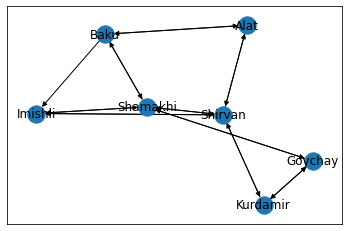

In [10]:
plt.figure()
nx.draw_networkx(G, with_labels=True)
plt.show()

## 3.2 Airports

In [11]:
data2 = pd.read_csv('airports.csv')
data2.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,AirTime,Origin,Dest,Distance
0,2008,1,3,4,2003.0,1955,2211.0,2225,116.0,IAD,TPA,810
1,2008,1,3,4,754.0,735,1002.0,1000,113.0,IAD,TPA,810
2,2008,1,3,4,628.0,620,804.0,750,76.0,IND,BWI,515
3,2008,1,3,4,926.0,930,1054.0,1100,78.0,IND,BWI,515
4,2008,1,3,4,1829.0,1755,1959.0,1925,77.0,IND,BWI,515


In [12]:
G2 = nx.from_pandas_edgelist(data2, source='Origin', target='Dest', edge_attr=True, create_using=nx.DiGraph)

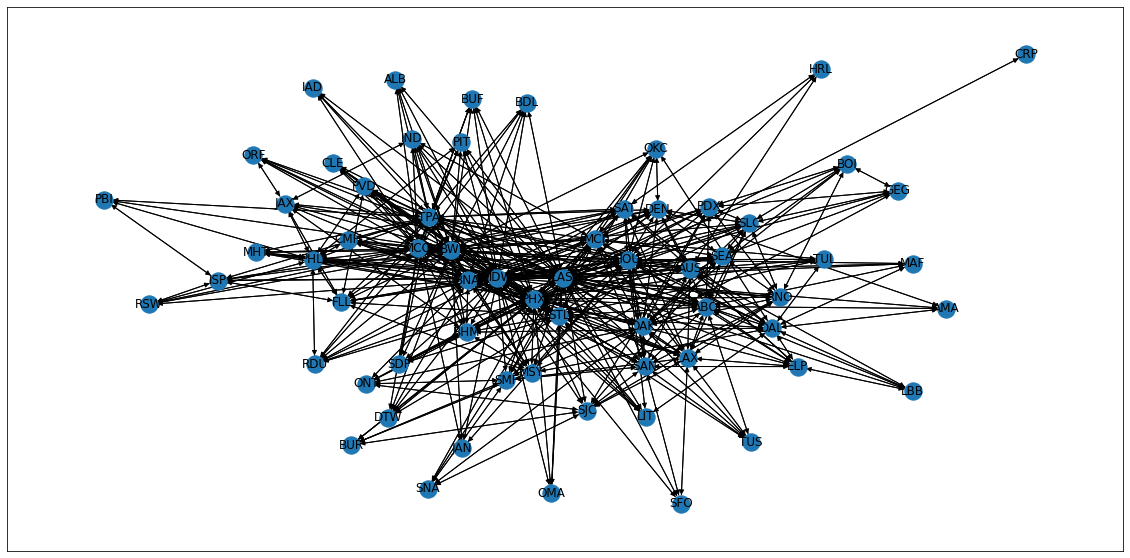

In [13]:
plt.figure(figsize=(20, 10))
nx.draw_networkx(G2, with_labels=True)
plt.show()

In [14]:
# Shortest path between CRP and BOI with respect to the distance
print("From CRP to BOI : {}".format(nx.shortest_path(G2, source='CRP', target='BOI', weight='Distance')))
print("From BOI to CRP : {}".format(nx.shortest_path(G2, source='BOI', target='CRP', weight='Distance')))

From CRP to BOI : ['CRP', 'HOU', 'ABQ', 'SLC', 'BOI']
From BOI to CRP : ['BOI', 'SLC', 'ABQ', 'HOU', 'CRP']


In [15]:
# Shortest path between CRP and BOI with respect to the air time
print("From CRP to BOI : {}".format(nx.shortest_path(G2, source='CRP', target='BOI', weight='AirTime')))
print("From BOI to CRP : {}".format(nx.shortest_path(G2, source='BOI', target='CRP', weight='AirTime')))

From CRP to BOI : ['CRP', 'HOU', 'DEN', 'SLC', 'BOI']
From BOI to CRP : ['BOI', 'LAS', 'HOU', 'CRP']


In [16]:
# Degree Connectivity
def degree_inflow(G, node):
    return G.in_degree(node)
def degree_outflow(G, node):
    return G.out_degree(node)
def degree(G, node):
    return G.degree(node)

print("Inflow degree : {}".format(degree_inflow(G2,'BOI')))
print("Outflow degree : {}".format(degree_outflow(G2,'BOI')))
print("Degree : {}".format(degree(G2, 'BOI')))

Inflow degree : 7
Outflow degree : 7
Degree : 14


In [17]:
# Closeness Centrality
def path_length(path):
    return len(path) - 1

def closeness_centrality(G, node, weight):
    total_length = 0
    nodes = list(G.nodes())
    for dest in nodes:
        if dest != node:
            path = nx.shortest_path(G, source=node, target=dest, weight=weight)
            total_length += path_length(path)
    return total_length/len(nodes)

In [18]:
print("Closeness centrality")
print("%s %10s %10s" % ("node", "distance", "air time"))
node_list = list(G2)
for node in node_list:
    print("%s %10.2f %10.2f" % (node, closeness_centrality(G2, node, 'Distance'), closeness_centrality(G2, node, 'AirTime')))

Closeness centrality
node   distance   air time
IAD       2.12       2.19
TPA       1.64       1.59
IND       2.22       1.98
BWI       1.48       1.53
JAX       2.28       2.17
LAS       1.12       1.12
MCI       1.91       1.73
MCO       1.58       1.53
MDW       1.28       1.30
PHX       1.33       1.42
ISP       2.08       2.12
FLL       2.20       2.05
PBI       2.55       2.50
RSW       2.48       2.33
JAN       2.27       2.16
HOU       1.56       1.55
BHM       1.86       1.83
BNA       1.66       1.69
ORF       2.12       2.11
PHL       2.16       2.03
ABQ       1.70       1.69
ALB       2.14       2.12
AMA       2.69       2.52
AUS       1.92       1.92
BDL       2.11       2.05
BOI       2.77       2.64
BUF       2.11       2.09
BUR       2.06       2.02
CLE       2.03       2.03
CMH       1.98       2.03
DEN       1.83       1.78
ELP       2.34       2.09
GEG       2.81       2.75
LAX       1.80       1.73
LBB       2.64       2.47
LIT       2.14       1.97
MAF       2.47  

In [19]:
# Betweenness Centrality

def get_path(G, src, dst, weight):
    try:
        return nx.shortest_path(G, src, dst, weight)
    except:
        return []
    
def get_all_pathes(G, weight):
    pathes = {}
    for src in G.nodes():
        for dst in G.nodes():
            if src != dst:
                path = get_path(G, src, dst, weight)
                if len(path) > 1:
                    pathes[src + '_' + dst] = path
    return pathes

def between_centrality(G, node, pathes):
    count = 0
    for path in pathes.values():
        if node in path:
            count += 1
    return count

In [20]:
pathes_distance = get_all_pathes(G2, 'Distance')
pathes_airtime = get_all_pathes(G2, 'AirTime')
print("Betweenness Centrality")
print("%s %10s %10s" % ("node", "distance", "air time"))
for node in G2.nodes():
    print("%s %10d %10d" % (node, between_centrality(G2, node, pathes_distance), between_centrality(G2, node, pathes_airtime)))

Betweenness Centrality
node   distance   air time
IAD        126        126
TPA        256        279
IND        132        128
BWI        478        476
JAX        136        138
LAS        606        763
MCI        242        216
MCO        272        261
MDW        782        778
PHX        317        288
ISP        126        126
FLL        144        143
PBI        126        126
RSW        126        126
JAN        126        126
HOU        416        432
BHM        200        230
BNA        264        269
ORF        126        126
PHL        162        142
ABQ        382        365
ALB        126        126
AMA        126        141
AUS        201        194
BDL        126        126
BOI        132        131
BUF        126        126
BUR        130        130
CLE        126        126
CMH        158        160
DEN        282        218
ELP        142        141
GEG        128        128
LAX        136        138
LBB        126        137
LIT        196        134
MAF        150

In [21]:
# Network Density
def network_density(G):
    nodes = G.nodes()
    total_degree = 0
    for node in nodes:
        total_degree += degree(G, node)
    return total_degree/(len(nodes) * (len(nodes) - 1))

print("Network density: %.2f" % network_density(G2))

Network density: 0.41


In [22]:
# Network Diameter
def network_diameter(G, weight):
    pathes = get_all_pathes(G, weight)
    path_len = 0
    for path in pathes.values():
        if len(path) > path_len:
            path_len = len(path)
    return path_len

print("Network Diameter:")
print("Distance as weight : %d" % network_diameter(G2, 'Distance'))
print("Air time as weight : %d" % network_diameter(G2, 'AirTime'))

Network Diameter:
Distance as weight : 6
Air time as weight : 6


In [23]:
# Network Average Path Length
def network_average_path_length(G, weight):
    pathes = get_all_pathes(G, weight)
    total_path_len = 0
    for path in pathes.values():
        total_path_len += len(path)
    return total_path_len/len(pathes)


print("Network Average Path Length:")
print("Distance as weight : %.2f" % network_average_path_length(G2, 'Distance'))
print("Air time as weight : %.2f" % network_average_path_length(G2, 'AirTime'))  

Network Average Path Length:
Distance as weight : 3.09
Air time as weight : 3.03
